# Iris Dataset Analysis

## Table of Contents
- **Step 1 - Importing Packages**
>
- **Step 2 - Reading our Data Set and organising it**
>
- **Step 3 - Outputting Summaries of variables**
    - **Step 3.1 - Fixing df.describe**
    - **Step 3.2 - Creating the Summary txt files**
>
- **Step 4 - Creating the Plots Histograms**
    - **4.1 Saving the Histograms into PNG files**
>
- **Step 5 - Creating the Plots Part 2 Scatterplots**
>
- **Step 6 - Extra Pairplots**
>
- **Step 7 - Additional Findings, Analysis and Last Thoughts**
>
- **eferences**

### Step 1 - Importing Packages

The first step before we do anything, will be to import the packages we need for this evaluation and data extractions. Packages are as follows:

In [6]:
# Importing the packages we plan to use. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As we can see, Pandas will be needed to interact with the iris document as well as numpy for all our data manipulation. Numpy is there for one specific section which will be detailed further on.

Then, for all our plots, we'll need matplotlib and seaborn. While seaborn can extend what matplotlib does, I did notice that some of the commands were not working if I did not have matplolib installed. Such as saving the plots to a png file for instance. As such, we'll need both.

### Step 2 - Reading our Data Set and organising it

The first issue we had was with the document itself. We can see that the document is not a csv file, but actually a data file. I wasn't sure if Pandas was able to read data files or if there was any specific command that we needed to use to in order to read a "data" file. ChatGPT was able to inform me that the process is the same and I need only name the string of document in the read_csv command.<sup>1</sup>

The Iris data set comes with no column names and using Pandas, we have no way of actually knowing what columns are what. Through the names txt file, we know what the attributes are but we need to name them in order to work with them.<sup>2 3</sup> Notice the below example:

In [7]:
# This is to showcase what I mean. Notice how when I ask for the first 5 rows, I get no header names.
df_no_names = pd.read_csv('iris.data')
print(df_no_names.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


Since it's really hard to work with those values, we need to go ahead and name them. Luckily, we already have the names in the iris.names document, so let's go ahead and name them accordingly, with a list, from left ro right, in order:

In [8]:
# We assign our column names to a variable, so that we are able to know what we're working with later on.
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

After our columns have been named, we can go ahead and open the data set in our folder with Pandas.

In [9]:
# Have Pandas read the iris csv file and assign our column names to its "names"
df = pd.read_csv('iris.data', names=column_names)
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


Now, it's way more clearer. We are also going to need to go ahead and assign all those values in each column to their own variables. This will make it easier to work with each feature later on in case need them. 

In [10]:
# Assigning each individual column to its own variable for ease of use later on.
sepal_length = df['sepal_length']
sepal_width  = df['sepal_width']
petal_length = df['petal_length']
petal_width  = df['petal_width']
species      = df['species']

### Step 3 - Outputting Summaries of variables
#### Step 3.1 - Fixing df.describe

With Pandas, we have access to a very handy function called .describe() which makes our lives incredibly easy when it comes to getting statistics and values out of the data set. 

The main issue is the presentation. If we don't want the median displayed as 50%, we have a problem. By default, Pandas displays it like this. After searching online on how to make it state only the mean and display it as "mean", not as 50%. there was one possibility found, which was the use of __df.describe(percentiles=[])__. Unfortunately, __df.describe(percentiles=[])__ still includes the 50%. This is more of a stylistic problem choice but it needs to be solved

The proposed alternative then, is to use __select_dtypes__ to basically get just the numeric values, seeing that we're more interested in that rather than the species at the moment.<sup>4</sup>

In [11]:
numeric_df = df.select_dtypes(include=['number'])

This basically creates a variable called __numeric_df__ and assigns it the function __select_dtypes__ that should be able to specify only the columns with numeric data types (such as integers and floats). 
>
In other words, it scans the entire DataFrame (df, which contains the Iris dataset) and filters out only those columns that contain numerical values, ignoring any columns with non-numeric data (like strings or categories, such as the species column).

Next, we move forward to getting our actual values, for this, we're gonna use the following functions from numpy:
>
np.mean

np.min

np.max

np.std

np.median

Each of these will provide us with what __df.describe__ would provide with one line of code, but instead of showing us the median as 50%, we can actually use this to call our stats what we want and organise them how we wish. 

#### Step 3.2 - Creating the Summary txt files

Now, for the actual creation of the txt, I'm going to break this code down and I'll explain in the comments what is actually happening here.<sup>5 6</sup>

In [ ]:
# We begin by opening or "creating" a txt file called summary. We will call it f. The With makes sure that we don't need to close the file afterwards,
# it should close automatically. 
with open("summary.txt", "w") as f:

# Now, we're going to iterate through the columns. This for loop will iterate through each column in the numeric.df variable we have created above that should only
# contain numeric values.
    for column in numeric_df.columns:

# Next, we will extract all the values from the current column into a Numpy array called "data".
        data = numeric_df[column].values

# Now, we can go ahead and write into the txt file what we want. We'll write statistics for the first column (the first column should be Sepal_length), and then we get for that column
# the various stats, 2 decimal places up, and we will repeat this same code and go through this loop as many times as there are columns.
        f.write(f"Statistics for {column}:\n")
        f.write(f"  Mean: {np.mean(data):.2f}\n")
        f.write(f"  Minima: {np.min(data):.2f}\n")
        f.write(f"  Maxima: {np.max(data):.2f}\n")
        f.write(f"  Standard Deviation: {np.std(data):.2f}\n")
        f.write(f"  Median: {np.median(data):.2f}\n")
        f.write("\n")  

# We'll finish it all with a print to just signal to whoever ran the code that the summary txt was successfully generated. 
print("Summary exported to iris_numeric_summary.txt")

Summary exported to iris_numeric_summary.txt


With our txt file now created with all our statistics, we can try and extract some analysis. 

```
Statistics for sepal_length:
  Mean: 5.84
  Minima: 4.30
  Maxima: 7.90
  Standard Deviation: 0.83
  Median: 5.80

Statistics for sepal_width:
  Mean: 3.05
  Minima: 2.00
  Maxima: 4.40
  Standard Deviation: 0.43
  Median: 3.00

Statistics for petal_length:
  Mean: 3.76
  Minima: 1.00
  Maxima: 6.90
  Standard Deviation: 1.76
  Median: 4.35

Statistics for petal_width:
  Mean: 1.20
  Minima: 0.10
  Maxima: 2.50
  Standard Deviation: 0.76
  Median: 1.30
```

From the summaries we have extracted, we can see that overall, there's nothing particularly egregious about the data but we do notice that some features contain a higher Standard Deviation than others. For instance, petal length has a standard deviation of 1.76, indicating greater spread across the entire dataset. In contrast, sepal width shows much less variation and appears more uniform across species.
>
1.76 is a huge number and already highlights that some species (we're not sure which ones yet, but we could infer Petal Length) are driving that standard deviation up. In other words, there are outliers present in those features that are not shared accross the species and given that number, we can clearly see that the gap between the species could be large.

### Step 4 - Creating the Plots (Histograms)

For the plot, there are many ways that we can approach this. Should we get each variable only? Or maybe each variable accross all three species? After some research, 
we're able to find some insights on one article<sup>8</sup> , where the user showcased the different variables all plotted on top of each other in histograms. This is a good approach and we can try and replicate this.

The article uses Seaborn<sup>7</sup> which we have already imported. There is also a section there, where the user separates the data into three sections. We won't need to do that. We are doing different things here and we needed to export the data into txt files. This means that we already have our organisations and variables done, so we can work with that and go straight into the plots themselves. 

The main problem we're going to have is the colour palette, in particular when it comes to the Sepals. In the data, we can see that the Sepals have very close values. All in the 3 to 5 range. That means that if we display these two species together, depending on the colour and number of bins, it will be incredibly difficult to see and differentiate between them.<sup>10</sup>

Given this issue, we need to dedicate a lot of time to what colour we want for our histograms. After many attempts, the preferred colour is Seaborns built in __muted__ option.<sup>9 11</sup>

In [13]:
# Chose our colour palette for our histograms from seaborns built in colour packages.
sns.set_palette("muted")

After this is done, we go ahead with Seaborn itself. We grab our our df (dataset), our hue, which would help us know that all species need to have different colours,
and the height which I left as the original. It seemed to look well overall. 

Next comes the histplot itself. We get each variable, followed by the number of bins (I went with 10 after several tries) and opacity.<sup>12</sup>

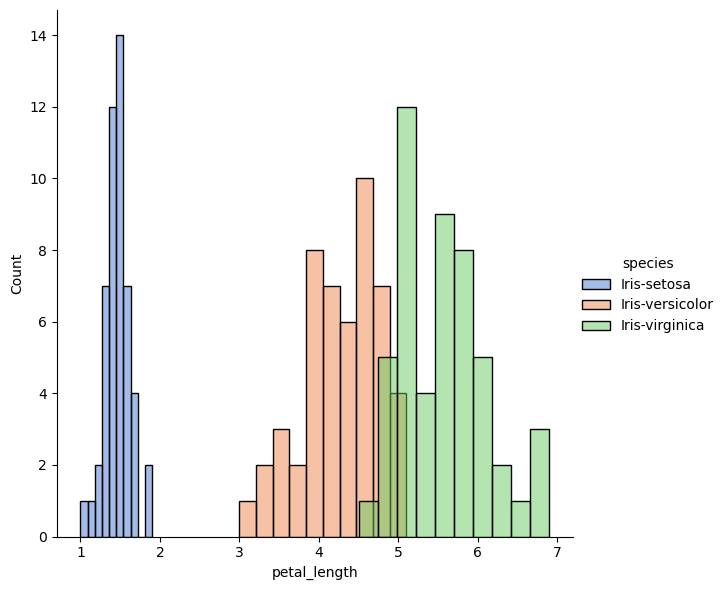

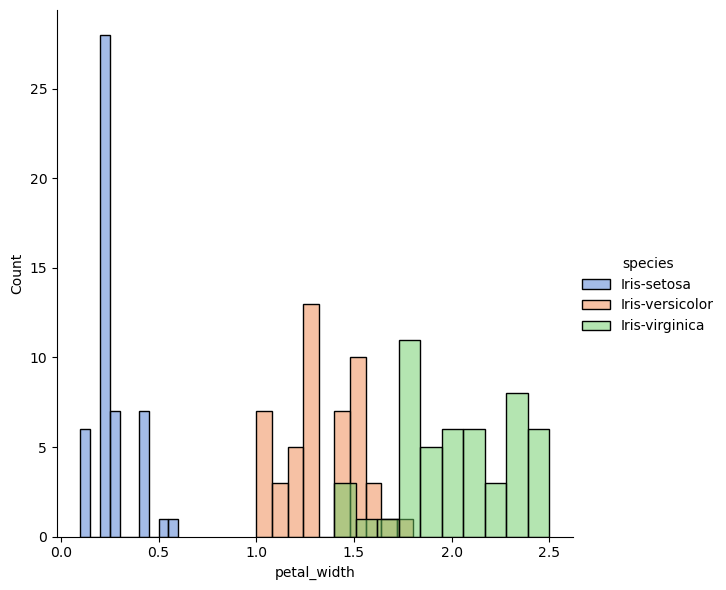

In [ ]:
# For our petals, assigned them variables, so that we save them as png files later on and defined as per seaborn's and matplotlib's documentation, from left to right: Our data, our info on the side, 
# the height of our plot, followed by the type of plot we want, the name of column we are counting, the number of bins, the opacity and finally just the function to add the legend.
petal_length_histogram = sns.FacetGrid(df, hue="species", height=6).map(sns.histplot, "petal_length", bins=10, alpha=0.5).add_legend()
petal_width_histogram = sns.FacetGrid(df, hue="species",  height=6).map(sns.histplot, "petal_width", bins=10, alpha=0.5).add_legend()

# In here, are our commands for showing the plots and closing them (For Jupyter Notebooks, it's not really necessary to close them but in the actual script it is)
plt.show()
plt.close()

The plots will highlight our initial findings here and show us if our initial assumptions were correct. 
>
For both Petal Histograms, it seems we were correct in our initial assumptions. We can see that the Petals of the Setosa are all on the left side of the plot, separated from the other two. 
Something is happening here that's driving the petals, at least for that species, to be in their own cluster. Interestingly enough, the same doesn't happen for Petal width, which has a lower Standard Deviation than Sepal length but shows no overlap with the other species at all. 

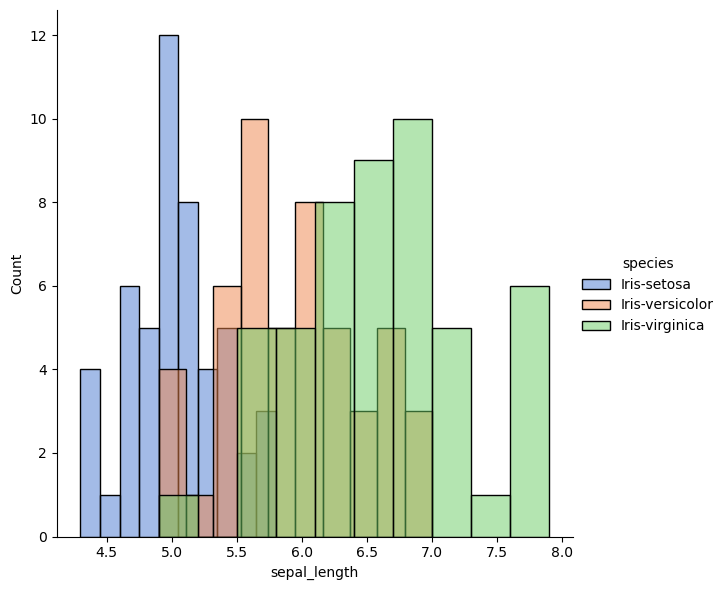

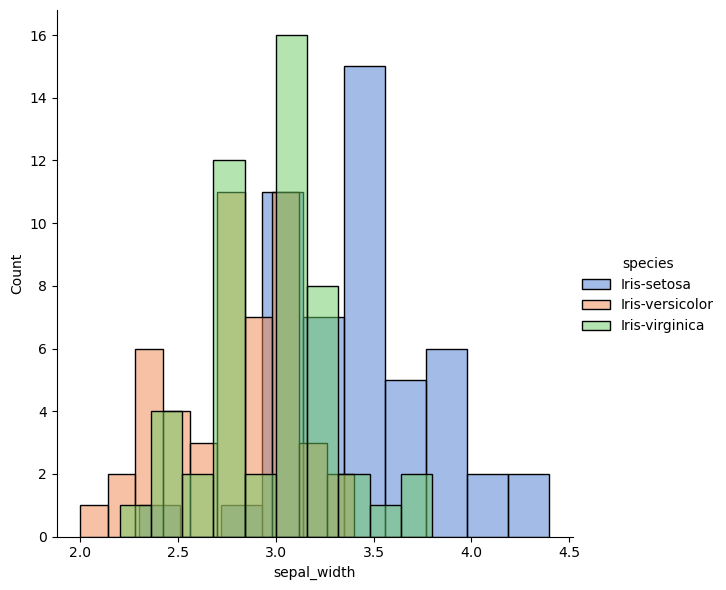

In [15]:
# Same logic for the Sepals as we did for the Petals above.
sepal_length_histogram = sns.FacetGrid(df, hue="species",  height=6).map(sns.histplot, "sepal_length", bins=10, alpha=0.5).add_legend()
sepal_width_histogram = sns.FacetGrid(df, hue="species",  height=6).map(sns.histplot, "sepal_width", bins=10, alpha=0.5).add_legend()
plt.show()
plt.close()

When it comes to Sepals however, there isn't that much of a correlation and all species seem to share the same characteristics mostly. While we do find some slight variation in the Sepal lenghts (once more, Setosa comes in), when it comes to the Sepal Widths, the graphs being so close to one another is a good reflection of the low standard deviation of that feature.

#### 4.1 Saving the Histograms into PNG files

Finally we saved all of the above to different pngs.<sup>13</sup> ChatGPT<sup>14</sup> helped me here and reminded me that the previous code needed to be saved to a specific variable. Luckily, we did that already, so we can work with those variables now.


In [16]:
# We just use the savefig command to export these as png files and make sure that the png is "tight" as in, the plot is fitted into the image with no extra blank spaces. 
petal_length_histogram.savefig("petal_length_histogram.png", bbox_inches='tight')
petal_width_histogram.savefig("petal_width_histogram.png", bbox_inches='tight')
sepal_length_histogram.savefig("sepal_length_histogram.png", bbox_inches='tight')
sepal_width_histogram.savefig("sepal_width_histogram.png", bbox_inches='tight')

### Step 5 - Creating the Plots Part 2 (Scatterplots)

Now, for the scatterplot, we need to once again decide on what colours we're going to use here. Since we've already decided on "muted"
for the histograms, let's keep that one for consistency and pull from that with seaborn.
By following the documentation in the seaborn website<sup>15</sup>, we just need to pull from our data(df), assign our x and y which have already been defined previously and choose the palette. 
>
Afterwards, we make sure that we also export that to its respective png file.
>
>
_Note_ - Something interesting I've found but I really didn't understand why, was that I didn't need the variable for the scatterplot in order to save it, the same way I did with the histograms before. I consulted ChatGPT on this to understand why I was continously getting an error while trying to save the scatterplots to a png.<sup>16</sup>

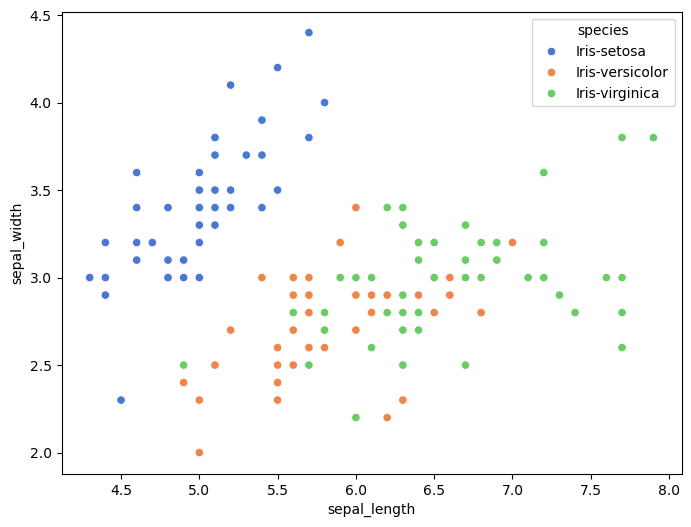

In [ ]:
# We assign once more our dataframe and name our x and y values (which will be our columns), the hue and the palette we want. 
# I also found out about .figure which allows us to create  blank canvas so we can specify the height and width we want.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette="muted")
# Save it with the savefig command.
plt.savefig("sepal_scatterplot.png", bbox_inches='tight')
plt.show()

Scatterplots are a great way to help us visualise two features across multiple categories. It allows us to basically plot one variable on the x-axis and another on the y-axis and from there, we can see if there exists any correlation between these two variables.
>
From this scatterplot and at least when it comes to the Sepals, we can see that there isn't any particular correlation. Once more, we do see that the Setosa species is clearly different from the other two. While Versicolor and Virginica are clustered together, with sepal length mostly increasing with sepal width, Setosa is very particular in its space, with high sepal width and below average lenght.
>
If we were to fit a linear regression into this scatterplot, we would be hesitant to find anything other than noise accross the overall species. But at least when it comes to individual species and as mentioned before, they all increase their length in proportion with their width, generally speaking.

We repeat the same for the petals.

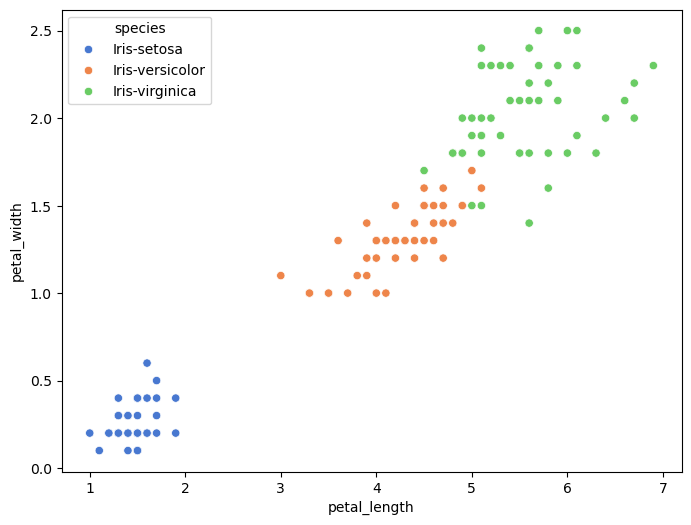

In [ ]:
# Same as the one above.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", palette="muted")
plt.savefig("petal_scatterplot.png", bbox_inches='tight')
plt.show()

When it comes to petals however, this is different. We have clear trends and particularly, we can see that both Versicolor and Virginica have high lengths and high widths. Setosa on the other hand, is more singular and remains at the bottom of the plot with low petal values. 
>
Once more, we can see a clear separation between Setosa and the other two species. 

If we would like to go one step further, we could even go ahead and try to map a linear regression to see if our eyes definitely are able to pick the trend we suppose exists in these two scatterplots. This can be achieved with Numpy and Polyfit<sup>17 18</sup> in the following way: 

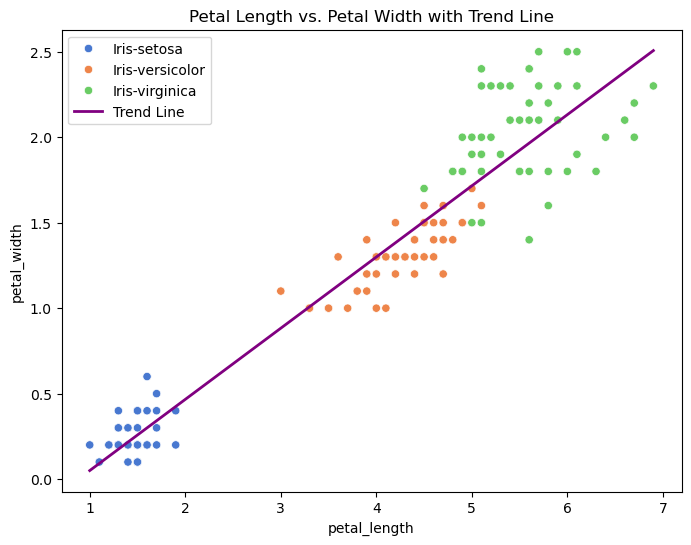

In [ ]:
# First, we create the scatterplot, same as before
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", palette="muted")

# Now, we try and fit our line. First we store the numeric features we've done before into variables. In this case the x and the y
x = df['petal_length']
y = df['petal_width']

# Next we create the slope and the intercept which will follow the Polynomial equation: y=mx+b. We will also follow the syntax outlined in the Numpy documentation as best as we can.
slope, intercept = np.polyfit(x, y, 1)

# Then we create two variables and apply np.linespace to the x_line variable. The code followed for this had numbers, but in this case, we just go with the min and max. This will make it easy
# for us since we're able to just get whatever values are on the scatterplot itself.
x_line = np.linspace(x.min(), x.max())

# For the y_line, we could have used np.poly1d(coeff), but the formula itself was chosen.
y_line = slope * x_line + intercept

# And finally we build our plot on top of the scatterplot we did at the top. We add the line we created. Add a linewidth and just a label. Give a title and a legend.
plt.plot(x_line, y_line, color='purple', linewidth=2, label='Trend Line')
plt.title("Petal Length vs. Petal Width with Trend Line")
plt.legend()
plt.savefig("petal_scatterplot_trend_line.png", bbox_inches='tight')
plt.show()

Let's do the same for our Sepals and see if there is a trend:

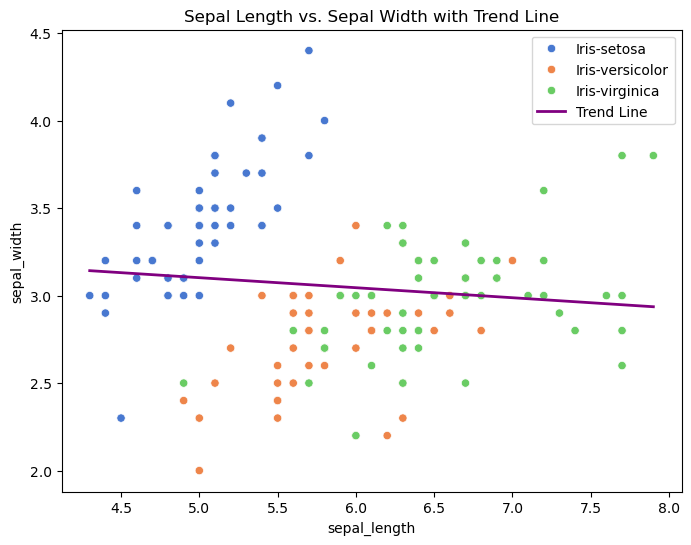

In [ ]:
# We can copy the exact same format as above, but just make sure we adjust with the correct values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette="muted")

# I used the same global variables here. For the purposes of this Jupyter Notebook, it gets our point accross because one plot gets shown and the variables get replaced so there shouldn't 
# technically be a problem.
x = df['sepal_length']
y = df['sepal_width']

slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max())
y_line = slope * x_line + intercept

plt.plot(x_line, y_line, color='purple', linewidth=2, label='Trend Line')
plt.title("Sepal Length vs. Sepal Width with Trend Line")
plt.legend()
plt.savefig("sepal_scatterplot_trend_line.png", bbox_inches='tight')
plt.show()

As we can see, our intuitions were correct and there is definitely a trend happening here. Particularly when it comes to our initial guess. The Petals are very predictable accross all 3 species, but when it comes to the Sepals, that's when it's harder to see any correlation whatsoever. 

Now, there are some limitations with this, particularly when it comes to the Sepal measurements. The great thing about Polyfit, is that it can create a line out of everything but it really doesn't tell us much beyond the fact that there is a "possible" downward slope there. We would gain much more from this Sepal scatterplot, if we were able to just plot a line across all species.
>
We can draw inspiration from another user who was able to do this in a very simple way<sup>19</sup>. Namely, through the use of Seaborn's lmplot function<sup>20</sup>. The code itself isn't too difficult as we can just follow Seaborn's documentation on this.

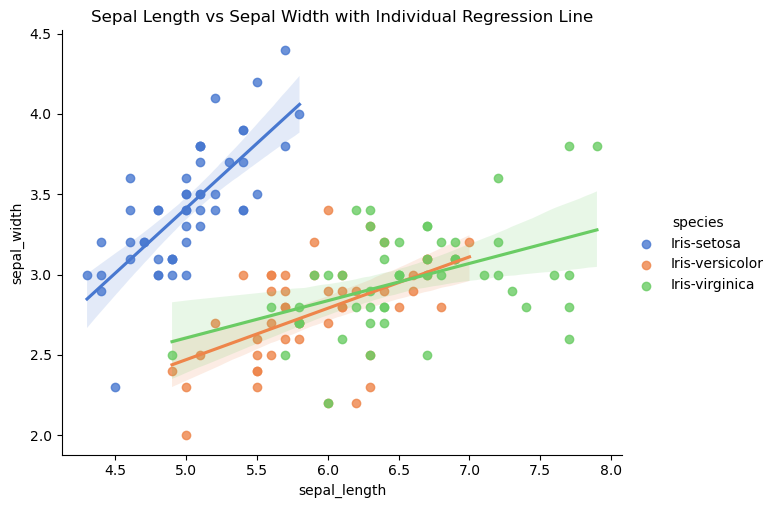

In [ ]:
# We start with following the documentation and assigning our x, y, our dataframe and our hue and we make sure we select the correct palette for consistency.
# After some issues with the size, I then added the other two conditions, namely height and aspect as per the documentation.
sns.lmplot(x='sepal_length', y='sepal_width', data=df, hue='species', palette="muted", height=5, aspect=1.3)

# Afterwards, we just name it and display it.
plt.title("Sepal Length vs Sepal Width with Individual Regression Line")
plt.savefig("sepal_scatterplot_individual_line.png", bbox_inches='tight')
plt.show()

This gives us more insight on any possible trends, especially as it examines the relationships between individual features. If we look at our previous Scatterplot with the regression line, we could see an almost flat line across the whole plot, tilting slightly downward. However, in this plot, we see that all features are trending upwards. In other words, as Sepal Width increases, Sepal Length also increases, indicating a positive correlation.
>
Setosa still has the clearest trend. Versicolor and Virginica are remain largely mixed, so this plot doesn't help us with predictability. However, what this plot shows us is that across all species at least, an increase in one feature generally correlates with an increase in the other, highlighting an underlying trend or relationship.

### Step 6 - Extra (Pairplots)

One final analysis worth mentioning, comes to us via pairplots<sup>23</sup>. As it showcases the various relationships accross all variables, while more complete, it's also
more overwhelming to the eyes, making minute or specific detail finding more difficult. Once more, this is easily achieved with Seaborn and after looking through its documentation<sup>21</sup>, we can quickly make one as follows:

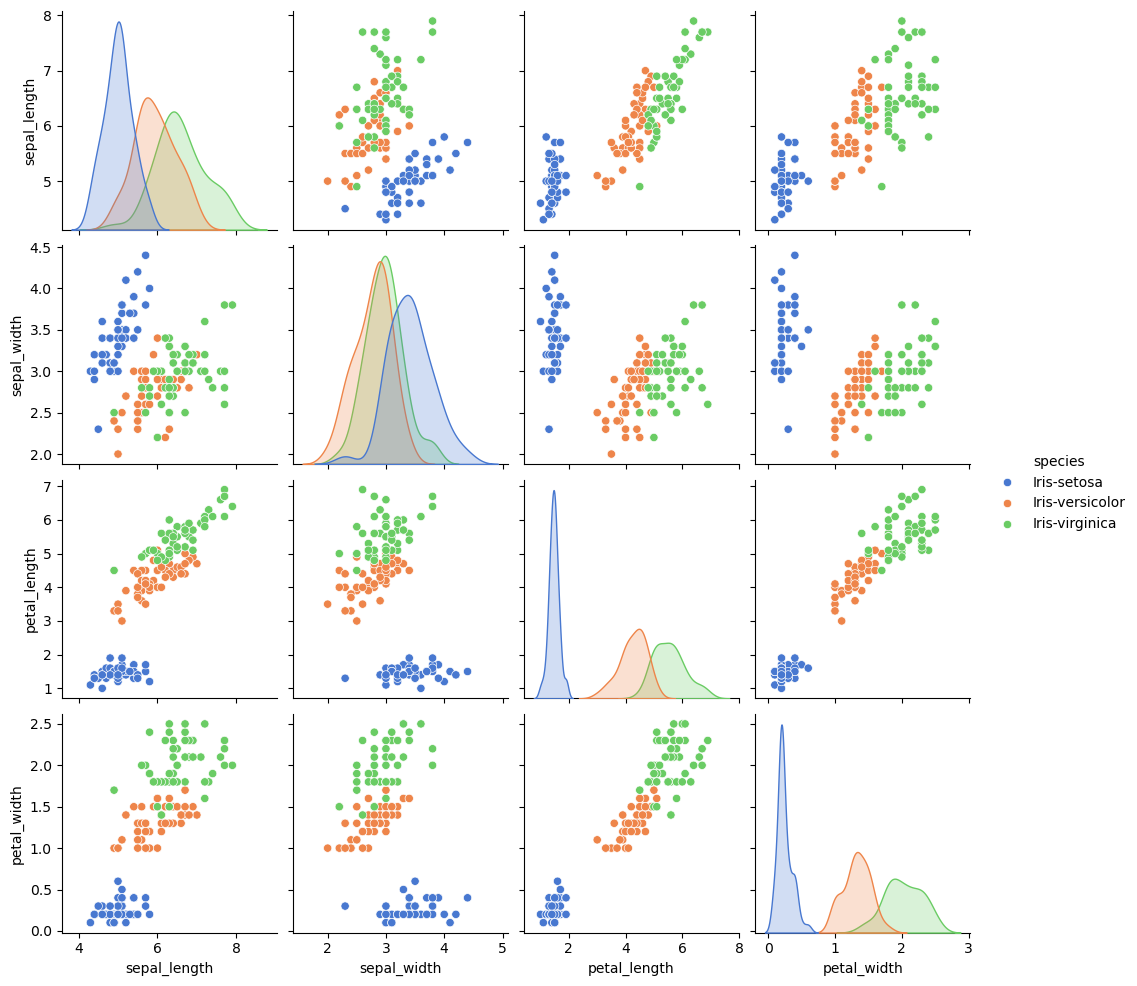

In [ ]:
# With seabornes' built in pairplot, we can just copy the format found in the documentation. Get the datafram and the hue.
pair_plot = sns.pairplot(df, hue="species", palette="muted")

# Save it in the same way as all the other ones before.
pair_plot.savefig("pairplot.png", bbox_inches='tight')
plt.show()

### Step 7 - Additional Findings, Analysis and Last Thoughts

The brilliant thing about pair plots is that they combine the best of both worlds when it comes to scatterplots and histograms. Rather than simply giving us just two features and comparing the two, they provide us with all possible feature combinations. This gives us a more holistic look at the data set and allows us to see if any trends picked up with the scatterplots (we did already see a couple of them), remain consistent across all feature relationships.

By looking at the above pairplot, we can see how across all feature comparisons, the Setosa cluster is always mostly separate from the other two. 

If on one hand, Versicolor and Virginica often form a combined, overlapping cluster, making it more challenging to separate them, on the other, Setosa stands out with its consistent, easily identifiable attributes, in both sepal and petal measurements.

If we have to choose however, which feature has the highest predictability, we would go with the two Petals. The average petal length for Iris Setosa is significantly smaller than that of the other two. Versicolor has double the length of Setosa and Virginica has the highest petal length of the 3. In terms of petal width, Setosa continues to remain at the smaller scale with the other two species once more continuing to remain consistent, in very much the same way as the Petal Length. 

As for Sepals, this is when we are unable to predict accurately any characteristic from both Versicolor and Virginica. If we were to make any prediction on which species we could guess, based on its Sepal size, we would have a hard time, given the high degree of feature similarity and overlapping ranges.

At the end of the day, the Iris data set is a great starting point for any sort of statistical analysis. It is particularly important in various test cases for classification methods due to its unique predictive nature. Most notably, and as we mentioned, the Setosa species, which stands apart to its other two cousins. 

This is not different to what the author of the dataset himself, R. A. Fisher, found back in 1936.<sup>22</sup> As we can see here:

— **Multiple Measurements in Taxonomic Problems**  
> *"It will be noticed, as was anticipated above, that there is some overlap of the distributions of I . virginica and I . versicolor, so that a certain diagnosis of these two species could not be based solely on these four measurements of a single flower taken on a plant growing wild. It is not, however, impossible that in culture the measurements alone should afford a more complete discrimination" (pg. 188-189, 1936)* 

Whether or not this data set can accurately predict any sort of flower of these same types is a separate question altogether, but given the small amount we have (150 flowers across only 3 species), it seems highly unlikely. What it does show us is that we are able to make predictions, based on several indepedent factors, notwithstanding the nature of the flowers themselves. It is not by chance that many consider the Iris Dataset as the "Hello World" of Data Analytics. 

### References

1. ChatGPT. (2025) __Response__: *The iris.data file is essentially a plain text file formatted as comma-separated values (CSV). Even though it doesn't have a ".csv" extension, it follows the same structure: each row represents a record, and the values are separated by commas.* OpenAI. Available at: https://chat.openai.com/ 

2. Taylor, S. (2019) Data Analysis Python: Exploring a Dataset & Summary Statistics. Medium. Available at: https://medium.com/@SamTaylor92/data-analysis-python-exploring-a-dataset-summary-statistics-afc7a690ec96 

3. Real Python. (n.d.) Filtering Data in a DataFrame. Available at: https://realpython.com/pandas-dataframe/#filtering-data 

4. pandas. (n.d.) pandas.DataFrame.select_dtypes. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html 

5. W3Schools. (n.d.) Python File Write. Available at: https://www.w3schools.com/python/python_file_write.asp 

6. pandas. (n.d.) pandas.api.types.is_numeric_dtype. Available at: https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html 

7. Seaborn. (n.d.) seaborn.FacetGrid. Available at: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 

8. Acharya, N. (2021) Exploratory Data Analysis of Iris Dataset. Medium. Available at: https://medium.com/@nirajan.acharya777/exploratory-data-analysis-of-iris-dataset-9c0df76771df 

9. Matplotlib. (n.d.) Colors in Matplotlib. Available at: https://matplotlib.org/stable/users/explain/colors/colors.html 

10. Seaborn. (n.d.) Color Palettes. Available at: https://seaborn.pydata.org/tutorial/color_palettes.html 

11. Seaborn. (n.d.) seaborn.color_palette. Available at: https://seaborn.pydata.org/generated/seaborn.color_palette.html 

12. Markov, M. (2021) Optimal Number of Bins for Histograms. Medium. Available at: https://medium.com/@maxmarkovvision/optimal-number-of-bins-for-histograms-3d7c48086fde 

13. Matplotlib. (n.d.) matplotlib.pyplot.savefig. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html 

14. ChatGPT. (2025) __Response__: *The best approach is to assign each FacetGrid to a variable, save its figure immediately with the savefig method (or plt.savefig using its .fig attribute), and then close that figure before moving on. This ensures that each plot is saved independently without overlapping.* OpenAI. Available at: https://chat.openai.com/ 

15. Seaborn. (n.d.) seaborn.scatterplot. Available at: https://seaborn.pydata.org/generated/seaborn.scatterplot.html 

16. ChatGPT. (2025).

    __Prompt__: _Why am I getting AttributeError: 'AxesSubplot' object has no attribute 'savefig' when I try to save the scatterplot to a PNG file?_

    __Response__: _sepalscatterplot is not a full figure (Figure object); it’s an AxesSubplot object (the "area" inside the figure where the plot happens). Axes objects do not have a .savefig() method. Only the entire Figure object (controlled by matplotlib) has .savefig()! Call plt.savefig(...) after plotting, like this: plt.savefig(...)._
    OpenAI. Available at: https://chat.openai.com/ 

17. Scaler. (n.d.) NumPy polyfit: Fitting trend lines to data. Available at: https://www.scaler.com/topics/numpy-polyfit/ 

18. NumPy Developers. (n.d.) numpy.linspace — NumPy v1.26 Manual. Available at: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html 

19. THAMIZH-ARASU. (n.d.) Exploratory Data Analysis on The Iris Data Set. Available at: https://github.com/THAMIZH-ARASU/Exploratory-Data-Analysis-on-The-Iris-Data-Set/blob/main/iris_exploration.ipynb 

20. Seaborn. (n.d.) seaborn.lmplot. Available at: https://seaborn.pydata.org/generated/seaborn.lmplot.html 

21. Seaborn. (n.d.) seaborn.pairplot. Available at: https://seaborn.pydata.org/generated/seaborn.pairplot.html 

22. Fisher, R.A. (1936) The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), pp.179–188. Available at: https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x 

23. Analytics Vidhya. (2024) Pair Plots in Machine Learning. Available at: https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/ 



## End